In [115]:
from dataclasses import dataclass
import numpy as np
from numpy import ndarray, float64
import matplotlib.pyplot as plt
import scipy


In [116]:
TABLE1 = np.loadtxt("Data/TTB_Table_1_digitized-2.csv", delimiter=",")
TABLE6 = np.loadtxt("./Data/TTB_Table_6_digitized.csv", delimiter=",", skiprows=10, usecols=[0,1,2,3,4])

In [117]:
@dataclass
class EthanolMeasurement:
    concentration: float64  # %ethanol by mass
    density: ndarray  # g/cm^3
    dtemp: ndarray  # Celsius
    pmass: ndarray  # grams
    ptemp: ndarray  # Celsius


# Data for measurments of various concentrations of ethanol
ethanol00 = EthanolMeasurement(
    concentration=float64(0.0),
    density=np.array([0.9925, 0.9925, 0.9925]),
    dtemp=np.array([23.4, 23.4, 23.4]),
    pmass=np.array([60.505, 60.514, 60.507, 60.508]),
    ptemp=np.array([24.0, 24.0, 24.0]),
)

ethanol10 = EthanolMeasurement(
    concentration=float64(5.003 / 50.2),
    density=np.array([0.9757, 0.9799, 0.9801]),
    dtemp=np.array([25.7, 25.5, 25.5]),
    pmass=np.array([60.346, 60.347, 60.345]),
    ptemp=np.array([25.2, 25.2, 25.4]),
)

ethanol20 = EthanolMeasurement(
    concentration=float64(10.0 / 50.055),
    density=np.array([0.9627, 0.9652, 0.9657]),
    dtemp=np.array([26.9, 26.8, 26.9]),
    pmass=np.array([59.99, 59.987, 59.985]),
    ptemp=np.array([25.8, 25.6, 25.8]),
)

ethanol30 = EthanolMeasurement(
    concentration=float64(15.0 / 50.285),
    density=np.array([0.9462, 0.9480, 0.9481]),
    dtemp=np.array([27.3, 27.4, 27.4]),
    pmass=np.array([59.609, 59.607, 59.604]),
    ptemp=np.array([25.4, 25.4, 25.2]),
)

ethanol40 = EthanolMeasurement(
    concentration=float64(20.056 / 50.155),
    density=np.array([0.9269, 0.9303, 0.9315]),
    dtemp=np.array([24.8, 24.9, 24.9]),
    pmass=np.array([59.036, 59.031, 59.029]),
    ptemp=np.array([25.0, 25.0, 25.0]),
)

ethanol50 = EthanolMeasurement(
    concentration=float64(25.026 / 50.006),
    density=np.array([0.9085, 0.9078, 0.9081]),
    dtemp=np.array([25.4, 26.0, 26.1]),
    pmass=np.array([58.520, 58.520, 58.519]),
    ptemp=np.array([25.4, 25.6, 25.4]),
)

ethanol60 = EthanolMeasurement(
    concentration=float64(30.028 / 50.175),
    density=np.array([0.8874, 0.8867, 0.8865]),
    dtemp=np.array([25.2, 25.4, 25.5]),
    pmass=np.array([57.958, 57.948, 57.944]),
    ptemp=np.array([24.0, 24.2, 24.3]),
)

ethanol80 = EthanolMeasurement(
    concentration=float64(40.148 / 49.953),
    density=np.array([0.8557, 0.8457, 0.8445]),
    dtemp=np.array([24.0, 24.3, 24.3]),
    pmass=np.array([58.612, 58.613, 58.606]),
    ptemp=np.array([21.5, 22.0, 22.2]),
)

ethanol90 = EthanolMeasurement(
    concentration=float64(45.076 / 50.101),
    density=np.array([0.8156, 0.8153, 0.8152]),
    dtemp=np.array([23.9, 23.9, 24.0]),
    pmass=np.array([57.737, 57.737, 57.739]),
    ptemp=np.array([23.4, 23.4, 23.4]),
)

ethanol_measurments = [
    ethanol00,
    ethanol10,
    ethanol20,
    ethanol30,
    ethanol40,
    ethanol50,
    ethanol60,
    ethanol80,
    ethanol90,
]


@dataclass
class Pycnometer:
    empty_mass: float64  # in grams
    volume: float64  # in cm^3
    std_volume: float64


def new_pycnometer(
    empty_mass: float64, full_mass: ndarray, water_density: float64
) -> Pycnometer:
    water_mass = full_mass - empty_mass
    water_volume = water_mass / water_density
    volume = water_volume.mean()
    std_volume = water_volume.std()
    return Pycnometer(empty_mass, volume, std_volume)


pycnometer1 = new_pycnometer(
    34.817, np.array([60.505, 60.514, 60.507, 60.508]), 0.997296
)
pycnometer2 = new_pycnometer(35.844, np.array([62.600, 62.586]), 0.997747)


@dataclass
class PycnometerMeasurment:
    full_mass: float64  # in grams
    avg_temp: float64  # in C
    density: float64  # in g/cc
    std_density: float64


def new_pycnometer_measurement(pycnometer: Pycnometer, mass: ndarray, temp: ndarray):
    fluid_mass = mass - pycnometer.empty_mass
    avg_mass = fluid_mass.mean()
    std_mass = fluid_mass.std()
    avg_temp = temp.mean()

    avg_density = avg_mass / pycnometer.volume
    std_density = avg_density * np.sqrt(
        (std_mass / avg_mass) ** 2 + (pycnometer.std_volume / pycnometer.volume) ** 2
    )
    return PycnometerMeasurment(avg_mass, avg_temp, avg_density, std_density)


which_pycno = [
    pycnometer1,
    pycnometer1,
    pycnometer1,
    pycnometer1,
    pycnometer1,
    pycnometer1,
    pycnometer1,
    pycnometer2,
    pycnometer2,
]
pycnometer_measurments: list[PycnometerMeasurment] = []
for i, eth in enumerate(ethanol_measurments):
    measurment = new_pycnometer_measurement(which_pycno[i], eth.pmass, eth.ptemp)
    pycnometer_measurments.append(measurment)

print(pycnometer_measurments[0].density)


0.997296


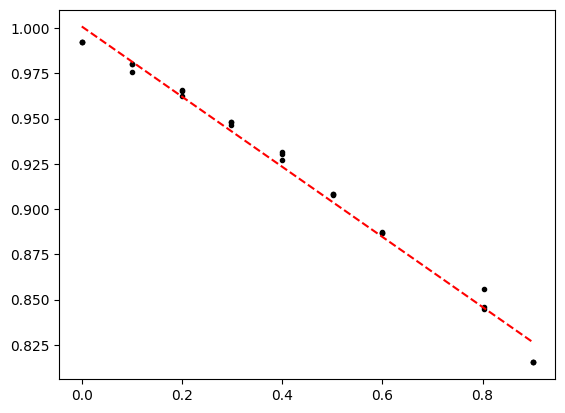

In [118]:
concs = []
for i in ethanol_measurments:
    concs.append(i.concentration)
    concs.append(i.concentration)
    concs.append(i.concentration)
concs = np.array(concs)

densities = []
for i in ethanol_measurments:
    densities.append(i.density[0])
    densities.append(i.density[1])
    densities.append(i.density[2])
densities = np.array(densities)

slope, intercept, rvalue, _, stderr = scipy.stats.linregress(concs, densities)
conc_range = np.linspace(0.0, 0.9, 1000)

plt.plot(concs, densities, "k.")
plt.plot(conc_range, slope * conc_range + intercept, "r--")
plt.show()


In [159]:
def find_nearest(data, value):
    idx = (np.abs(data - value)).argmin()
    return idx


def true_proof(density, temperature):
    """
    Accepts a density in g/cm^3 and a temperature in C and returns the true proof
    """
    alpha = 25e-6
    t1 = (temperature * 1.8) + 32
    p2 = density * (1 + alpha * (t1 - 60))
    spg2 = p2 / 0.99904

    interp_proof = scipy.interpolate.interp1d(TABLE6[:, 4], TABLE6[:, 0])
    c2 = interp_proof(spg2)

    cr = np.floor(c2)
    tr = np.floor(t1)

    proof_range = np.arange(0, 207)
    temp_range = np.arange(1, 101)
    temp_idx = np.where(temp_range == tr)[0][0] + 1
    proof_idx = np.where(proof_range == cr)[0][0]

    f = TABLE1[proof_idx, temp_idx]
    f_proof_plus_one = TABLE1[proof_idx + 1, temp_idx]
    f_temp_plus_one = TABLE1[proof_idx, temp_idx + 1]

    df_dC = (f_proof_plus_one - f) / (cr + 1 - cr)
    df_dT = (f_temp_plus_one - f) / (tr + 1 - tr)

    true_proof = f + (c2 - cr) * df_dC + (t1 - tr) * df_dT
    return true_proof


def mass_fraction(true_proof):
    p_water_60 = 0.99904
    p_ethanol_60 = 0.79313
    interp_percent_water = scipy.interpolate.interp1d(TABLE6[:, 0], TABLE6[:, 2])
    vol_percent_water = interp_percent_water(true_proof)
    vol_percent_ethanol = true_proof / 2
    mass_frac_ethanol = (vol_percent_ethanol * p_ethanol_60) / (
        vol_percent_ethanol * p_ethanol_60 + vol_percent_water * p_water_60
    )
    return mass_frac_ethanol


def mole_fraction(true_proof):
    p_water_60 = 0.99904
    p_ethanol_60 = 0.79313
    molar_mass_ethanol = 46.06844
    molar_mass_water = 18.01528
    interp_percent_water = scipy.interpolate.interp1d(TABLE6[:, 0], TABLE6[:, 2])
    vol_percent_water = interp_percent_water(true_proof)
    vol_percent_ethanol = true_proof / 2
    mole_frac_ethanol = (vol_percent_ethanol * p_ethanol_60 / molar_mass_ethanol) / (
        (vol_percent_ethanol * p_ethanol_60 / molar_mass_ethanol)
        + (vol_percent_water * p_water_60 / molar_mass_water)
    )
    return mole_frac_ethanol


def temp_correct(density, dTemp, pTemp, true_proof):
    """
    Accepts a densitometer denstiy reading in g/cc a
    densometer and pycnometer temperature reading in C
    and a true_proof to return the temperature adjusted
    density measurement of the densitometer in g/cc
    """

    def FtoC(tempF):
        return (tempF - 32) * (5 / 9)

    alpha = 25e-6
    t1 = (dTemp * 1.8) + 32
    p2 = density * (1 + alpha * (t1 - 60))
    p_water = 0.99904
    spg2 = p2 / 0.99904

    interp_proof = scipy.interpolate.interp1d(TABLE6[:, 4], TABLE6[:, 0])
    c2 = interp_proof(spg2)

    cr = np.floor(c2)
    tr = np.floor(t1)

    proof_range = np.arange(0, 207)
    temp_range = np.arange(1, 101)
    temp_idx = np.where(temp_range == tr)[0][0] + 1
    proof_idx = np.where(proof_range == cr)[0][0]
    spg_idx = find_nearest(TABLE6[:, 1], true_proof / 2)

    tp_at_temp = TABLE1[proof_idx, temp_idx]
    tp_at_temp_plus_one = TABLE1[proof_idx, temp_idx + 1]
    spg = TABLE6[spg_idx, 4]
    spg_plus_one = TABLE6[spg_idx + 1, 4]
    ap_at_x = TABLE6[spg_idx, 0]
    ap_at_x_plus_one = TABLE6[spg_idx + 1, 0]

    dAP_dTP = abs((cr + 1 - cr) / (tp_at_temp_plus_one - tp_at_temp))
    dTP_dT = abs((tp_at_temp_plus_one - tp_at_temp) / (FtoC(tr + 1) - FtoC(tr)))
    dp_dAP = abs((p_water * (spg_plus_one - spg)) / (ap_at_x_plus_one - ap_at_x))

    dp_dT = abs(
        ((dTP_dT * dAP_dTP * dp_dAP) / (1 + alpha * (dTemp - 15.5556)))
        - ((alpha * density) / (1 + alpha * (dTemp - 15.5556)))
    )

    return density + dp_dT * (pTemp - dTemp)


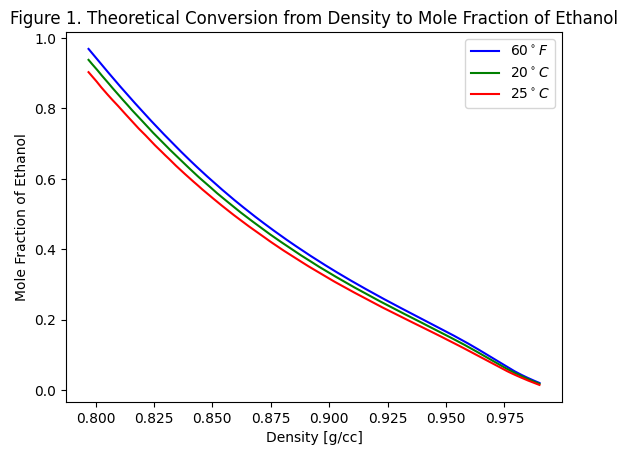

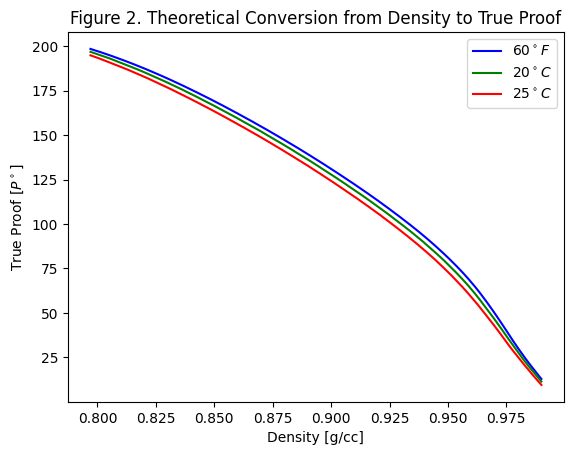

In [160]:
# Figure 1. mole fraction vs density for various temperatures
densities = np.linspace(0.7970, 0.9900, 1000)

true_proof_60F = []
true_proof_20C = []
true_proof_25C = []
for density in densities:
    true_proof_60F.append(true_proof(density, 15.5556))
    true_proof_20C.append(true_proof(density, 20))
    true_proof_25C.append(true_proof(density, 25))

mole_frac_60F = []
mole_frac_20C = []
mole_frac_25C = []
for i in range(len(densities)):
    mole_frac_60F.append(mole_fraction(true_proof_60F[i]))
    mole_frac_20C.append(mole_fraction(true_proof_20C[i]))
    mole_frac_25C.append(mole_fraction(true_proof_25C[i]))

plt.plot(densities, mole_frac_60F, "-", label="$60^\circ F$", color="blue")
plt.plot(densities, mole_frac_20C, "-", label="$20^\circ C$", color="green")
plt.plot(densities, mole_frac_25C, "-", label="$25^\circ C$", color="red")
plt.title("Figure 1. Theoretical Conversion from Density to Mole Fraction of Ethanol")
plt.xlabel("Density [g/cc]")
plt.ylabel("Mole Fraction of Ethanol")
plt.legend()
plt.show()

# Figure 2. true proof vs density for various temperatures
plt.plot(densities, true_proof_60F, "-", label="$60^\circ F$", color="blue")
plt.plot(densities, true_proof_20C, "-", label="$20^\circ C$", color="green")
plt.plot(densities, true_proof_25C, "-", label="$25^\circ C$", color="red")
plt.title("Figure 2. Theoretical Conversion from Density to True Proof")
plt.xlabel("Density [g/cc]")
plt.ylabel("True Proof $[P^\circ]$")
plt.legend()
plt.show()


In [158]:
temp_correct(0.8500, 31, 28, 159.80)

0.842567825396936